# 고객 대출 등급 분류

## 1. 데이터 불러오기

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [234]:
train_data = pd.read_csv("C:/Users/jinje/바탕 화면/내일배움캠프/심화 프로젝트/train.csv")
test_data = pd.read_csv("C:/Users/jinje/바탕 화면/내일배움캠프/심화 프로젝트/test.csv")

In [235]:
train_data

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


## 2. 데이터 살펴보기

In [236]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [237]:
train_data.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [238]:
train_data.groupby("대출기간").count()

,ID,대출금액,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
대출기간,,,,,,,,,,,,,,
36 months,64479,64479,64479,64479,64479,64479,64479,64479,64479,64479,64479,64479,64479,64479
60 months,31815,31815,31815,31815,31815,31815,31815,31815,31815,31815,31815,31815,31815,31815


months 제외하고 수치형 변수로 전환

In [239]:
train_data.groupby("근로기간").count()

,ID,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
근로기간,,,,,,,,,,,,,,
1 year,6249,6249,6249,6249,6249,6249,6249,6249,6249,6249,6249,6249,6249,6249
1 years,56,56,56,56,56,56,56,56,56,56,56,56,56,56
10+ years,31585,31585,31585,31585,31585,31585,31585,31585,31585,31585,31585,31585,31585,31585
10+years,896,896,896,896,896,896,896,896,896,896,896,896,896,896
2 years,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450
3,89,89,89,89,89,89,89,89,89,89,89,89,89,89
3 years,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581
4 years,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588
5 years,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665


In [366]:
train_data.groupby("근로기간").mean().sort_values(by = "연간소득")

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
근로기간,,,,,,,,,
Unknown,1.409460e+07,6.037176e+07,22.716879,23.909892,0.280903,660296.563569,318874.578029,67.875860,0.004056
3,1.540079e+07,8.253461e+07,19.423933,23.134831,0.337079,730848.539326,298700.764045,0.000000,0.000000
1 years,1.765875e+07,8.717464e+07,19.903929,24.607143,0.285714,663433.285714,386440.500000,0.000000,0.017857
<1 year,1.707454e+07,8.726859e+07,18.394919,25.235135,0.283784,870971.059459,411170.010811,316.345946,0.000000
< 1 year,1.754431e+07,8.782486e+07,18.669581,24.148315,0.326344,779173.773604,399569.171083,47.009004,0.006560
1 year,1.738036e+07,8.809890e+07,18.719027,24.215875,0.358617,817702.337014,406286.605857,35.796447,0.006721
2 years,1.766202e+07,9.084845e+07,18.617898,24.341065,0.373964,792533.338225,414199.011124,67.809231,0.005799
3 years,1.778408e+07,9.238047e+07,18.828827,24.195621,0.316713,819721.392956,412578.176494,51.683419,0.005276
4 years,1.805441e+07,9.273204e+07,18.773479,24.273801,0.301897,833416.748031,426474.304939,43.391553,0.004295


1year & 1 years --> 1  
10+ years & 10+years --> 10+  
2years --> 2  
3 & 3years --> 3  
<1 year & < 1 year --> <1  
나머지는 years 삭제

In [240]:
train_data.groupby("주택소유상태").count()

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
주택소유상태,,,,,,,,,,,,,,
ANY,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MORTGAGE,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934
OWN,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654
RENT,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705


ANY는 뭘까..?

In [241]:
train_data.groupby("대출목적").count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
대출목적,,,,,,,,,,,,,,
기타,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725
부채 통합,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150
소규모 사업,787,787,787,787,787,787,787,787,787,787,787,787,787,787
신용 카드,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500
의료,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039
이사,506,506,506,506,506,506,506,506,506,506,506,506,506,506
자동차,797,797,797,797,797,797,797,797,797,797,797,797,797,797
재생 에너지,60,60,60,60,60,60,60,60,60,60,60,60,60,60
주요 구매,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803


In [242]:
train_data.groupby("총연체금액").count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,연체계좌수,대출등급
총연체금액,,,,,,,,,,,,,,
0.0,96113,96113,96113,96113,96113,96113,96113,96113,96113,96113,96113,96113,96113,96113
2400.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4800.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72444.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
72864.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
74076.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [243]:
train_data.groupby("연체계좌수").count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,대출등급
연체계좌수,,,,,,,,,,,,,,
0.0,95762,95762,95762,95762,95762,95762,95762,95762,95762,95762,95762,95762,95762,95762
1.0,507,507,507,507,507,507,507,507,507,507,507,507,507,507
2.0,24,24,24,24,24,24,24,24,24,24,24,24,24,24
4.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [244]:
train_data.groupby("대출등급").count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
대출등급,,,,,,,,,,,,,,
A,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772
B,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817
C,27623,27623,27623,27623,27623,27623,27623,27623,27623,27623,27623,27623,27623,27623
D,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354
E,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354
F,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954
G,420,420,420,420,420,420,420,420,420,420,420,420,420,420


#### 이상치

In [245]:
train_data.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x193a1d6bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x193a1d6bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a1c91b50>],
 'medians': [<matplotlib.lines.Line2D at 0x193a23c7d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a23c7730>],
 'means': []}

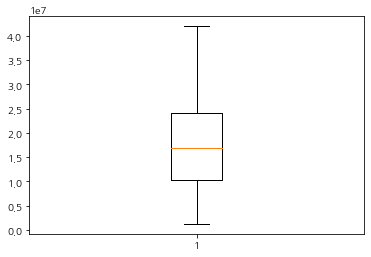

In [246]:
plt.boxplot(train_data["대출금액"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a1e574f0>,
 'caps': [<matplotlib.lines.Line2D at 0x193a23187c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a1e578e0>],
 'medians': [<matplotlib.lines.Line2D at 0x193a1e09d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a1e09850>],
 'means': []}

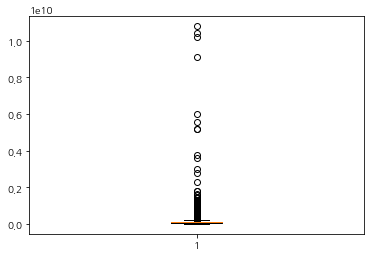

In [247]:
plt.boxplot(train_data["연간소득"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a2363e50>,
 'caps': [<matplotlib.lines.Line2D at 0x193a235deb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a2363790>],
 'medians': [<matplotlib.lines.Line2D at 0x193a236ab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a236a7c0>],
 'means': []}

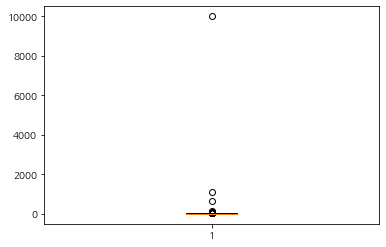

In [248]:
plt.boxplot(train_data["부채_대비_소득_비율"])

In [249]:
train_data.groupby("부채_대비_소득_비율").count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
부채_대비_소득_비율,,,,,,,,,,,,,,
0.00,17,17,17,17,17,17,17,17,17,17,17,17,17,17
0.03,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.08,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.09,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120.66,1,1,1,1,1,1,1,1,1,1,1,1,1,1
125.25,1,1,1,1,1,1,1,1,1,1,1,1,1,1
672.52,1,1,1,1,1,1,1,1,1,1,1,1,1,1


부채 대비 소득 비율 = (소득/부채)*100 인데  
이게 9999라는 건 .. 부채가 엄청 조금이고 소득은 많다는 것 ..?  
소득 대비 부채 비율이 더 일리있어보임

In [250]:
train_data[train_data["부채_대비_소득_비율"] == 9999]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


근데 또 등급은 C네

{'whiskers': [<matplotlib.lines.Line2D at 0x193a05009a0>,
 'caps': [<matplotlib.lines.Line2D at 0x193a05003d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a0500ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x193a19c2e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a19c2820>],
 'means': []}

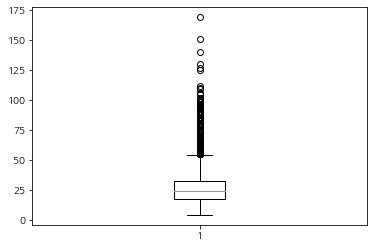

In [251]:
plt.boxplot(train_data["총계좌수"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a1b336a0>,
 'caps': [<matplotlib.lines.Line2D at 0x193a1b33280>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a1b5f550>],
 'medians': [<matplotlib.lines.Line2D at 0x193a1b6ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a1b6a640>],
 'means': []}

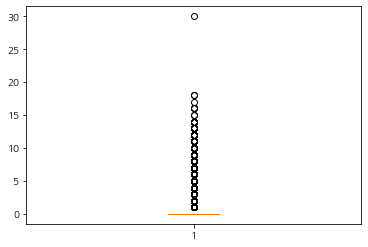

In [252]:
plt.boxplot(train_data["최근_2년간_연체_횟수"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a04fadc0>,
 'caps': [<matplotlib.lines.Line2D at 0x193a04fa280>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a236f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x193a04fa220>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a1ca4790>],
 'means': []}

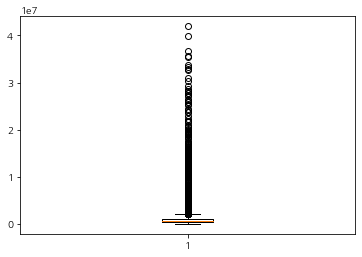

In [253]:
plt.boxplot(train_data["총상환원금"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a04bdbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x193a04bd490>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a04bd7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x193a1b4c100>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a1b4cac0>],
 'means': []}

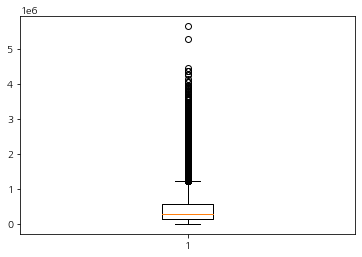

In [254]:
plt.boxplot(train_data["총상환이자"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a02f1550>,
 'caps': [<matplotlib.lines.Line2D at 0x193a02f1f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a02f15b0>],
 'medians': [<matplotlib.lines.Line2D at 0x193a1b764c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a1b767f0>],
 'means': []}

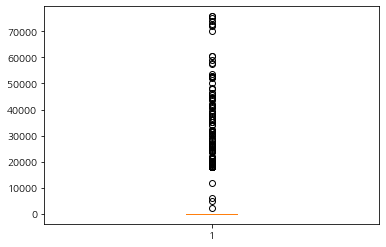

In [255]:
plt.boxplot(train_data["총연체금액"])

{'whiskers': [<matplotlib.lines.Line2D at 0x193a03ad520>,
 'caps': [<matplotlib.lines.Line2D at 0x193a03ad820>,
 'boxes': [<matplotlib.lines.Line2D at 0x193a03381f0>],
 'medians': [<matplotlib.lines.Line2D at 0x193a0320b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x193a0320b50>],
 'means': []}

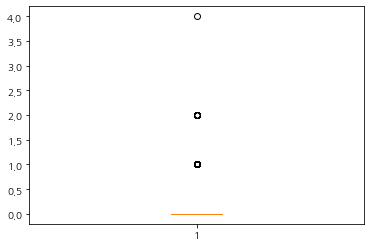

In [256]:
plt.boxplot(train_data["연체계좌수"])

## 3. 데이터 전처리

train 데이터랑 test 데이터 병합해서 전처리 함께 진행 후 종속변수가 비어있는 것을 다시 test 데이터로 분리

In [257]:
train_data

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [258]:
test_data

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,TEST_64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [259]:
ppc_df = pd.concat([train_data, test_data])
ppc_df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0,NaN
64193,TEST_64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0,NaN
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0,NaN
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0,NaN


### (1) 변수 기본 전처리

1. `근로기간` 
- 범주형 묶어주기 10+, <1 기호 살리기
    
    ※ 추후에 수치형으로도 변환해보고 결과 비교 예정 

In [260]:
ppc_df.groupby("근로기간").count()

,ID,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
근로기간,,,,,,,,,,,,,,
1 year,10484,10484,10484,10484,10484,10484,10484,10484,10484,10484,10484,10484,10484,6249
1 years,95,95,95,95,95,95,95,95,95,95,95,95,95,56
10+ years,52522,52522,52522,52522,52522,52522,52522,52522,52522,52522,52522,52522,52522,31585
10+years,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512,896
2 years,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,8450
3,138,138,138,138,138,138,138,138,138,138,138,138,138,89
3 years,12617,12617,12617,12617,12617,12617,12617,12617,12617,12617,12617,12617,12617,7581
4 years,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,5588
5 years,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,5665


In [261]:
ppc_df.replace('1 year','1', inplace=True)
ppc_df.replace('1 years','1', inplace=True)
ppc_df.replace('10+ years','10+', inplace=True)
ppc_df.replace('10+years','10+', inplace=True)
ppc_df.replace('2 years','2', inplace=True)
ppc_df.replace('3 years','3', inplace=True)
ppc_df.replace('4 years','4', inplace=True)
ppc_df.replace('5 years','5', inplace=True)
ppc_df.replace('6 years','6', inplace=True)
ppc_df.replace('7 years','7', inplace=True)
ppc_df.replace('8 years','8', inplace=True)
ppc_df.replace('9 years','9', inplace=True)
ppc_df.replace('< 1 year','<1', inplace=True)
ppc_df.replace('<1 year','<1', inplace=True)

In [262]:
ppc_df.groupby("근로기간").count()

,ID,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
근로기간,,,,,,,,,,,,,,
1,10579,10579,10579,10579,10579,10579,10579,10579,10579,10579,10579,10579,10579,6305
10+,54034,54034,54034,54034,54034,54034,54034,54034,54034,54034,54034,54034,54034,32481
2,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,14059,8450
3,12755,12755,12755,12755,12755,12755,12755,12755,12755,12755,12755,12755,12755,7670
4,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,9250,5588
5,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,9592,5665
6,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,3874
7,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,3814
8,8172,8172,8172,8172,8172,8172,8172,8172,8172,8172,8172,8172,8172,4888


In [367]:
ppc_df.groupby("근로기간").mean().sort_values(by = "연간소득")

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
근로기간,,,,,,,,,,,,,
Unknown,1.418035e+07,40.853876,6.034639e+07,23.061394,23.784958,0.262247,663821.839505,320836.268541,47.930767,0.004301,9.846581e+05,0.071896,344722.752544
<1,1.757140e+07,43.377528,8.796138e+07,18.581087,24.268197,0.324155,781717.112653,401368.214085,58.005906,0.006201,1.183085e+06,0.069938,407580.626507
1,1.735966e+07,43.379904,8.831114e+07,18.797161,24.234616,0.361282,813323.817374,414148.395501,48.626146,0.005861,1.227472e+06,0.072346,402714.780855
2,1.765490e+07,43.379757,9.141360e+07,18.675841,24.251156,0.363397,815879.702966,417283.099794,65.439647,0.005264,1.233163e+06,0.071623,408828.140930
3,1.777114e+07,43.503881,9.235365e+07,18.800603,24.280596,0.320502,808885.660525,412470.707958,47.315092,0.005488,1.221356e+06,0.070851,412043.251013
4,1.809188e+07,43.690378,9.370718e+07,18.960790,24.435027,0.300000,834787.764324,431886.232216,48.717405,0.004649,1.266674e+06,0.071757,417475.171171
9,1.868786e+07,44.540626,9.406690e+07,19.641673,25.135475,0.325807,829670.938464,441590.961361,38.062649,0.004293,1.271262e+06,0.070411,423593.443579
5,1.809773e+07,43.841535,9.505317e+07,18.997598,24.654399,0.319954,812000.170559,423997.550042,42.339033,0.004587,1.235998e+06,0.070375,416249.878371
7,1.821302e+07,44.035393,9.523721e+07,19.416587,24.797914,0.310792,852802.443356,444902.616527,34.879444,0.005214,1.297705e+06,0.073312,416001.132354


In [368]:
ppc_df.groupby("근로기간").median().sort_values(by = "연간소득")

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
근로기간,,,,,,,,,,,,,
Unknown,12000000.0,36.0,54000000.0,20.600,22.0,0.0,479580.0,207720.0,0.0,0.0,728580.0,0.065807,300000.000000
1,14400000.0,36.0,72000000.0,18.180,22.0,0.0,573684.0,274236.0,0.0,0.0,905532.0,0.065808,333333.333333
<1,15045000.0,36.0,72000000.0,17.940,22.0,0.0,563856.0,268146.0,0.0,0.0,882024.0,0.064860,333333.333333
2,15360000.0,36.0,75600000.0,18.010,22.0,0.0,591120.0,278292.0,0.0,0.0,923448.0,0.065807,340000.000000
3,15600000.0,36.0,76800000.0,18.250,22.0,0.0,588420.0,278532.0,0.0,0.0,920184.0,0.065341,350000.000000
4,15945000.0,36.0,78000000.0,18.530,23.0,0.0,595008.0,286248.0,0.0,0.0,945540.0,0.065361,360000.000000
5,16470000.0,36.0,78000000.0,18.400,23.0,0.0,592236.0,286122.0,0.0,0.0,941334.0,0.065138,360000.000000
6,16800000.0,36.0,78000000.0,18.860,23.0,0.0,605448.0,292572.0,0.0,0.0,953964.0,0.065808,366666.666667
7,16800000.0,36.0,78000000.0,18.960,23.0,0.0,616308.0,300576.0,0.0,0.0,987840.0,0.066297,360000.000000


unknown 이 <1 또는 1인 집단보다 평균과 중앙값이 훨씬 작기때문에 다른 집단으로 포함시키는 것이 적절하지 않음  
따로 두고 라벨인코딩 진행

2. `주택소유상태` 
- "ANY"인 것 삭제

In [263]:
ppc_df[ppc_df["주택소유상태"] == "ANY"]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10+,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [264]:
ppc_df = ppc_df[ppc_df["주택소유상태"] != "ANY"]
ppc_df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0,NaN
64193,TEST_64193,30000000,60 months,10+,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0,NaN
64194,TEST_64194,6120000,36 months,10+,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0,NaN
64195,TEST_64195,11520000,36 months,10+,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0,NaN


3. `부채_대비_소득_비율` 
- 9999(이상치) 일단 두기

In [265]:
ppc_df[ppc_df["부채_대비_소득_비율"] == 9999]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C
12571,TEST_12571,24000000,36 months,Unknown,MORTGAGE,0,9999.0,11,부채 통합,0,515748,317148.0,0.0,0.0,NaN


4. `대출기간` 
- months 제거하고 수치형으로

In [266]:
ppc_df.head(5)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [267]:
ppc_df.groupby("대출기간").count()

,ID,대출금액,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
대출기간,,,,,,,,,,,,,,
36 months,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,64478
60 months,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,31815


In [268]:
pd.set_option('mode.chained_assignment',  None)

In [269]:
ppc_df["대출기간"] = ppc_df["대출기간"].str.replace("36 months","36")
ppc_df["대출기간"] = ppc_df["대출기간"].str.replace("60 months","60")

In [270]:
ppc_df.groupby("대출기간").count()

,ID,대출금액,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
대출기간,,,,,,,,,,,,,,
36,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,107707,64478
60,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,52783,31815


In [271]:
ppc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160490 entries, 0 to 64196
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            160490 non-null  object 
 1   대출금액          160490 non-null  int64  
 2   대출기간          160490 non-null  object 
 3   근로기간          160490 non-null  object 
 4   주택소유상태        160490 non-null  object 
 5   연간소득          160490 non-null  int64  
 6   부채_대비_소득_비율   160490 non-null  float64
 7   총계좌수          160490 non-null  int64  
 8   대출목적          160490 non-null  object 
 9   최근_2년간_연체_횟수  160490 non-null  int64  
 10  총상환원금         160490 non-null  int64  
 11  총상환이자         160490 non-null  float64
 12  총연체금액         160490 non-null  float64
 13  연체계좌수         160490 non-null  float64
 14  대출등급          96293 non-null   object 
dtypes: float64(4), int64(5), object(6)
memory usage: 19.6+ MB


In [272]:
ppc_df["대출기간"] = ppc_df["대출기간"].astype(int)

In [273]:
ppc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160490 entries, 0 to 64196
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            160490 non-null  object 
 1   대출금액          160490 non-null  int64  
 2   대출기간          160490 non-null  int32  
 3   근로기간          160490 non-null  object 
 4   주택소유상태        160490 non-null  object 
 5   연간소득          160490 non-null  int64  
 6   부채_대비_소득_비율   160490 non-null  float64
 7   총계좌수          160490 non-null  int64  
 8   대출목적          160490 non-null  object 
 9   최근_2년간_연체_횟수  160490 non-null  int64  
 10  총상환원금         160490 non-null  int64  
 11  총상환이자         160490 non-null  float64
 12  총연체금액         160490 non-null  float64
 13  연체계좌수         160490 non-null  float64
 14  대출등급          96293 non-null   object 
dtypes: float64(4), int32(1), int64(5), object(5)
memory usage: 19.0+ MB


### (2) 파생변수 생성

[파생변수] → 차원축소 가능 

- 총상환액 = 총상환원금 + 총상환이자
- 총상환대출비율 = 총상환액 / 대출금액
- 월별대출금액 = 대출금액/대출기간

In [274]:
ppc_df_new = ppc_df
ppc_df_new

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10+,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36,3,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0,NaN
64193,TEST_64193,30000000,60,10+,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0,NaN
64194,TEST_64194,6120000,36,10+,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0,NaN
64195,TEST_64195,11520000,36,10+,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0,NaN


In [275]:
ppc_df_new["총상환액"] = ppc_df_new["총상환원금"] + ppc_df_new["총상환이자"]
ppc_df_new["총상환대출비율"] = ppc_df_new["총상환액"] / ppc_df_new["대출금액"]
ppc_df_new["월별대출금액"] = ppc_df_new["대출금액"] / ppc_df_new["대출기간"]
ppc_df_new

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.0,0.000000,346666.666667
1,TRAIN_00001,14400000,60,10+,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,607632.0,0.042197,240000.000000
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1080588.0,0.090049,333333.333333
3,TRAIN_00003,14400000,36,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,478932.0,0.033259,400000.000000
4,TRAIN_00004,18000000,60,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,377496.0,0.020972,300000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36,3,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0,NaN,2070912.0,0.069030,833333.333333
64193,TEST_64193,30000000,60,10+,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0,NaN,2205864.0,0.073529,500000.000000
64194,TEST_64194,6120000,36,10+,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0,NaN,212400.0,0.034706,170000.000000
64195,TEST_64195,11520000,36,10+,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0,NaN,1941408.0,0.168525,320000.000000


### (3) 수치형 변수 로그 변환

In [276]:
ppc_df_log = ppc_df_new
ppc_df_log

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.0,0.000000,346666.666667
1,TRAIN_00001,14400000,60,10+,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,607632.0,0.042197,240000.000000
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1080588.0,0.090049,333333.333333
3,TRAIN_00003,14400000,36,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,478932.0,0.033259,400000.000000
4,TRAIN_00004,18000000,60,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,377496.0,0.020972,300000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36,3,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0,NaN,2070912.0,0.069030,833333.333333
64193,TEST_64193,30000000,60,10+,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0,NaN,2205864.0,0.073529,500000.000000
64194,TEST_64194,6120000,36,10+,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0,NaN,212400.0,0.034706,170000.000000
64195,TEST_64195,11520000,36,10+,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0,NaN,1941408.0,0.168525,320000.000000


In [277]:
ppc_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160490 entries, 0 to 64196
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            160490 non-null  object 
 1   대출금액          160490 non-null  int64  
 2   대출기간          160490 non-null  int32  
 3   근로기간          160490 non-null  object 
 4   주택소유상태        160490 non-null  object 
 5   연간소득          160490 non-null  int64  
 6   부채_대비_소득_비율   160490 non-null  float64
 7   총계좌수          160490 non-null  int64  
 8   대출목적          160490 non-null  object 
 9   최근_2년간_연체_횟수  160490 non-null  int64  
 10  총상환원금         160490 non-null  int64  
 11  총상환이자         160490 non-null  float64
 12  총연체금액         160490 non-null  float64
 13  연체계좌수         160490 non-null  float64
 14  대출등급          96293 non-null   object 
 15  총상환액          160490 non-null  float64
 16  총상환대출비율       160490 non-null  float64
 17  월별대출금액        160490 non-null  float64
dtypes: fl

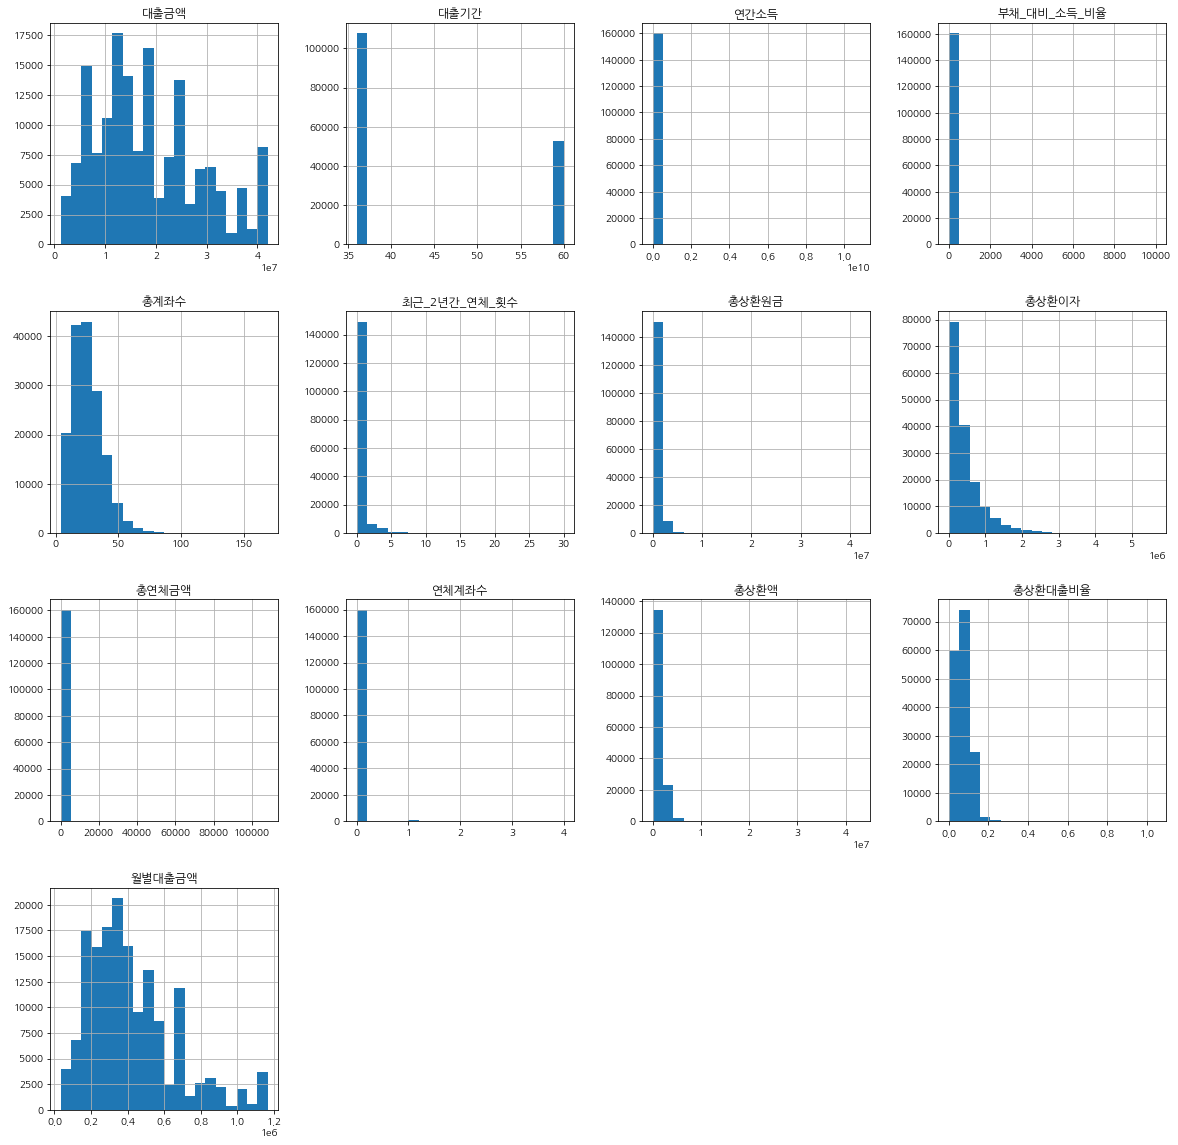

In [278]:
# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시

# data
df = ppc_df_log

# draw histogram graph
df.hist(bins=20, figsize=(20,20));

In [279]:
col = [c for c in df.columns if ppc_df_log[c].dtype != 'object']
num_df = ppc_df_log[col]
num_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,12480000,36,72000000,18.90,15,0,0,0.0,0.0,0.0,0.0,0.000000,346666.666667
1,14400000,60,130800000,22.33,21,0,373572,234060.0,0.0,0.0,607632.0,0.042197,240000.000000
2,12000000,36,96000000,8.60,14,0,928644,151944.0,0.0,0.0,1080588.0,0.090049,333333.333333
3,14400000,36,132000000,15.09,15,0,325824,153108.0,0.0,0.0,478932.0,0.033259,400000.000000
4,18000000,60,71736000,25.39,19,0,228540,148956.0,0.0,0.0,377496.0,0.020972,300000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,30000000,36,78000000,22.08,27,2,1307532,763380.0,0.0,0.0,2070912.0,0.069030,833333.333333
64193,30000000,60,109200000,12.06,26,0,960612,1245252.0,0.0,0.0,2205864.0,0.073529,500000.000000
64194,6120000,36,39600000,28.80,33,0,131520,80880.0,0.0,0.0,212400.0,0.034706,170000.000000
64195,11520000,36,66000000,25.44,41,1,1339536,601872.0,0.0,0.0,1941408.0,0.168525,320000.000000


In [280]:
log_df = np.log1p(num_df)
log_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,16.339638,3.610918,18.092177,2.990720,2.772589,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.756122
1,16.482739,4.110874,18.689180,3.149740,3.091042,0.000000,12.830869,12.363337,0.0,0.0,13.317326,0.041331,12.388398
2,16.300417,3.610918,18.379859,2.261763,2.708050,0.000000,13.741482,11.931274,0.0,0.0,13.893017,0.086223,12.716901
3,16.482739,3.610918,18.698312,2.778198,2.772589,0.000000,12.694116,11.938905,0.0,0.0,13.079316,0.032718,12.899222
4,16.705882,4.110874,18.088503,3.272985,2.995732,0.000000,12.339471,11.911413,0.0,0.0,12.841318,0.020755,12.611541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,17.216708,3.610918,18.172219,3.138966,3.332205,1.098612,14.083653,13.545513,0.0,0.0,14.543500,0.066752,13.633190
64193,17.216708,4.110874,18.508692,2.569554,3.295837,0.000000,13.775327,14.034849,0.0,0.0,14.606630,0.070951,13.122365
64194,15.627073,3.610918,17.494340,3.394508,3.526361,0.000000,11.786922,11.300734,0.0,0.0,12.266231,0.034117,12.043560
64195,16.259595,3.610918,18.005165,3.274878,3.737670,0.693147,14.107835,13.307802,0.0,0.0,14.478925,0.155742,12.676079


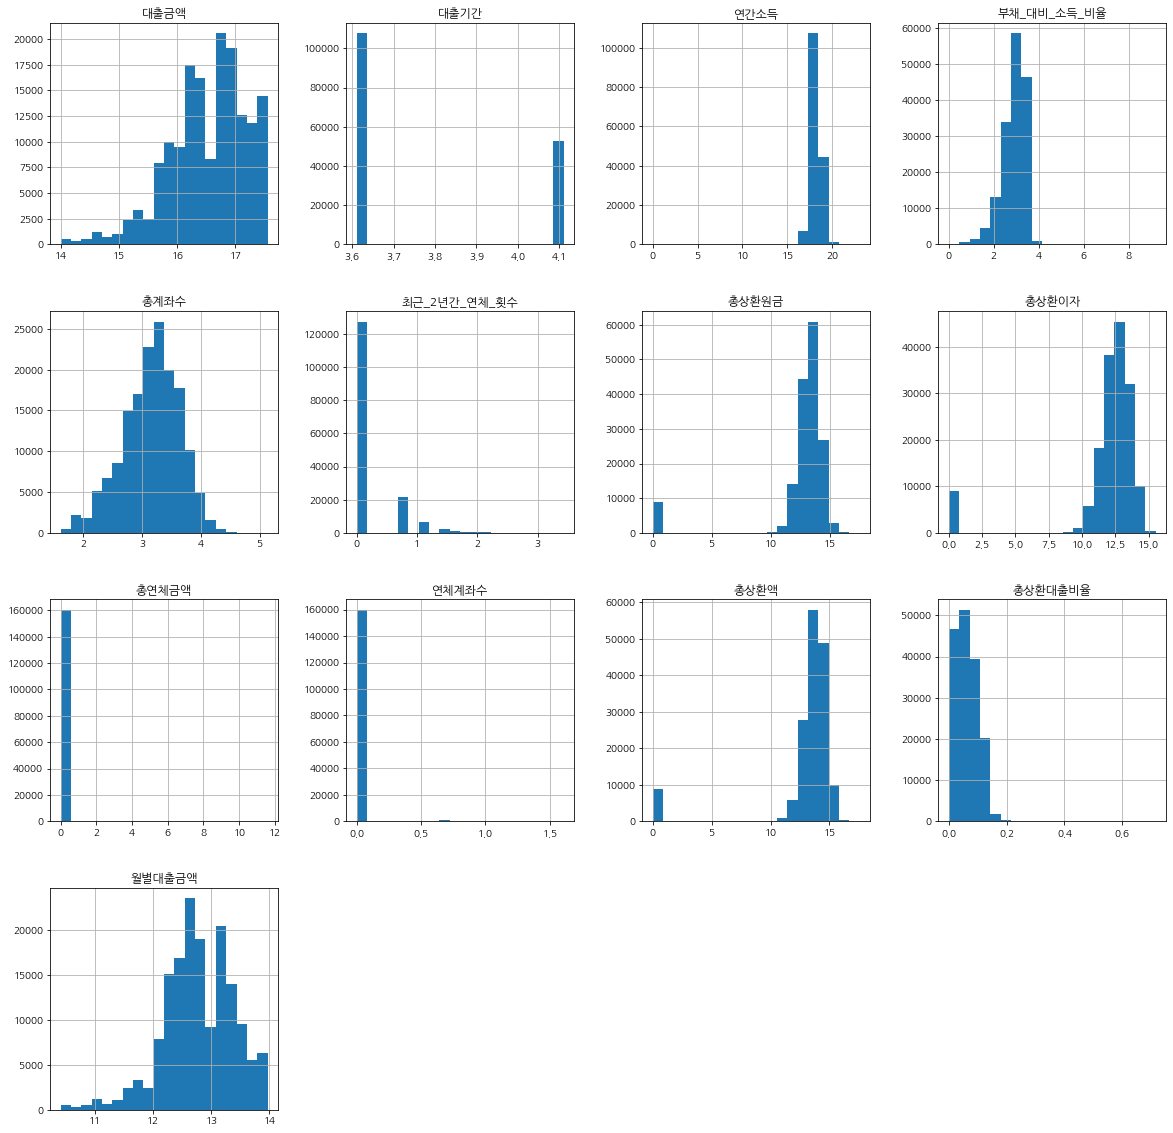

In [281]:
log_df.hist(bins=20, figsize=(20,20));

In [282]:
log_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,16.339638,3.610918,18.092177,2.990720,2.772589,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.756122
1,16.482739,4.110874,18.689180,3.149740,3.091042,0.000000,12.830869,12.363337,0.0,0.0,13.317326,0.041331,12.388398
2,16.300417,3.610918,18.379859,2.261763,2.708050,0.000000,13.741482,11.931274,0.0,0.0,13.893017,0.086223,12.716901
3,16.482739,3.610918,18.698312,2.778198,2.772589,0.000000,12.694116,11.938905,0.0,0.0,13.079316,0.032718,12.899222
4,16.705882,4.110874,18.088503,3.272985,2.995732,0.000000,12.339471,11.911413,0.0,0.0,12.841318,0.020755,12.611541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,17.216708,3.610918,18.172219,3.138966,3.332205,1.098612,14.083653,13.545513,0.0,0.0,14.543500,0.066752,13.633190
64193,17.216708,4.110874,18.508692,2.569554,3.295837,0.000000,13.775327,14.034849,0.0,0.0,14.606630,0.070951,13.122365
64194,15.627073,3.610918,17.494340,3.394508,3.526361,0.000000,11.786922,11.300734,0.0,0.0,12.266231,0.034117,12.043560
64195,16.259595,3.610918,18.005165,3.274878,3.737670,0.693147,14.107835,13.307802,0.0,0.0,14.478925,0.155742,12.676079


In [283]:
ppc_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160490 entries, 0 to 64196
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            160490 non-null  object 
 1   대출금액          160490 non-null  int64  
 2   대출기간          160490 non-null  int32  
 3   근로기간          160490 non-null  object 
 4   주택소유상태        160490 non-null  object 
 5   연간소득          160490 non-null  int64  
 6   부채_대비_소득_비율   160490 non-null  float64
 7   총계좌수          160490 non-null  int64  
 8   대출목적          160490 non-null  object 
 9   최근_2년간_연체_횟수  160490 non-null  int64  
 10  총상환원금         160490 non-null  int64  
 11  총상환이자         160490 non-null  float64
 12  총연체금액         160490 non-null  float64
 13  연체계좌수         160490 non-null  float64
 14  대출등급          96293 non-null   object 
 15  총상환액          160490 non-null  float64
 16  총상환대출비율       160490 non-null  float64
 17  월별대출금액        160490 non-null  float64
dtypes: fl

In [284]:
ppc_df_log1 = ppc_df_log[["ID","근로기간","주택소유상태","대출목적","대출등급"]]
ppc_df_log1

,ID,근로기간,주택소유상태,대출목적,대출등급
0,TRAIN_00000,6,RENT,부채 통합,C
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B
2,TRAIN_00002,5,MORTGAGE,부채 통합,A
3,TRAIN_00003,8,MORTGAGE,부채 통합,C
4,TRAIN_00004,Unknown,RENT,주요 구매,B
...,...,...,...,...,...
64192,TEST_64192,3,MORTGAGE,부채 통합,NaN
64193,TEST_64193,10+,MORTGAGE,부채 통합,NaN
64194,TEST_64194,10+,RENT,부채 통합,NaN
64195,TEST_64195,10+,MORTGAGE,부채 통합,NaN


In [285]:
log_df_new = pd.concat([ppc_df_log1,log_df], axis = 1)
log_df_new

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,16.339638,3.610918,18.092177,2.990720,2.772589,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.756122
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,16.482739,4.110874,18.689180,3.149740,3.091042,0.000000,12.830869,12.363337,0.0,0.0,13.317326,0.041331,12.388398
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,16.300417,3.610918,18.379859,2.261763,2.708050,0.000000,13.741482,11.931274,0.0,0.0,13.893017,0.086223,12.716901
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,16.482739,3.610918,18.698312,2.778198,2.772589,0.000000,12.694116,11.938905,0.0,0.0,13.079316,0.032718,12.899222
4,TRAIN_00004,Unknown,RENT,주요 구매,B,16.705882,4.110874,18.088503,3.272985,2.995732,0.000000,12.339471,11.911413,0.0,0.0,12.841318,0.020755,12.611541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,3,MORTGAGE,부채 통합,NaN,17.216708,3.610918,18.172219,3.138966,3.332205,1.098612,14.083653,13.545513,0.0,0.0,14.543500,0.066752,13.633190
64193,TEST_64193,10+,MORTGAGE,부채 통합,NaN,17.216708,4.110874,18.508692,2.569554,3.295837,0.000000,13.775327,14.034849,0.0,0.0,14.606630,0.070951,13.122365
64194,TEST_64194,10+,RENT,부채 통합,NaN,15.627073,3.610918,17.494340,3.394508,3.526361,0.000000,11.786922,11.300734,0.0,0.0,12.266231,0.034117,12.043560
64195,TEST_64195,10+,MORTGAGE,부채 통합,NaN,16.259595,3.610918,18.005165,3.274878,3.737670,0.693147,14.107835,13.307802,0.0,0.0,14.478925,0.155742,12.676079


#### train set / test set 다시 분리

In [286]:
new_test = log_df_new[log_df_new["대출등급"].isna()]
new_test.reset_index(drop = True)
new_test

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TEST_00000,8,MORTGAGE,주택 개선,NaN,16.636890,3.610918,18.698312,3.027231,2.564949,0.000000,12.885864,11.895497,0.0,0.0,13.201723,0.031712,13.053373
1,TEST_00001,5,RENT,부채 통합,NaN,15.943742,3.610918,18.315000,2.823757,3.258097,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.360228
2,TEST_00002,6,RENT,신용 카드,NaN,16.665060,3.610918,18.826146,2.241773,3.044522,0.000000,14.396038,12.549027,0.0,0.0,14.542480,0.113081,13.081543
3,TEST_00003,5,MORTGAGE,신용 카드,NaN,16.482739,3.610918,18.005165,2.689207,3.433987,0.693147,13.413577,12.548687,0.0,0.0,13.765005,0.063936,12.899222
4,TEST_00004,5,RENT,신용 카드,NaN,17.133326,3.610918,17.826474,3.449988,2.564949,0.000000,14.038697,13.329125,0.0,0.0,14.438716,0.065384,13.549809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,3,MORTGAGE,부채 통합,NaN,17.216708,3.610918,18.172219,3.138966,3.332205,1.098612,14.083653,13.545513,0.0,0.0,14.543500,0.066752,13.633190
64193,TEST_64193,10+,MORTGAGE,부채 통합,NaN,17.216708,4.110874,18.508692,2.569554,3.295837,0.000000,13.775327,14.034849,0.0,0.0,14.606630,0.070951,13.122365
64194,TEST_64194,10+,RENT,부채 통합,NaN,15.627073,3.610918,17.494340,3.394508,3.526361,0.000000,11.786922,11.300734,0.0,0.0,12.266231,0.034117,12.043560
64195,TEST_64195,10+,MORTGAGE,부채 통합,NaN,16.259595,3.610918,18.005165,3.274878,3.737670,0.693147,14.107835,13.307802,0.0,0.0,14.478925,0.155742,12.676079


In [287]:
new_train = log_df_new[log_df_new["대출등급"].notna()]
new_train.reset_index(drop = True)
new_train

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,16.339638,3.610918,18.092177,2.990720,2.772589,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.756122
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,16.482739,4.110874,18.689180,3.149740,3.091042,0.000000,12.830869,12.363337,0.0,0.0,13.317326,0.041331,12.388398
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,16.300417,3.610918,18.379859,2.261763,2.708050,0.000000,13.741482,11.931274,0.0,0.0,13.893017,0.086223,12.716901
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,16.482739,3.610918,18.698312,2.778198,2.772589,0.000000,12.694116,11.938905,0.0,0.0,13.079316,0.032718,12.899222
4,TRAIN_00004,Unknown,RENT,주요 구매,B,16.705882,4.110874,18.088503,3.272985,2.995732,0.000000,12.339471,11.911413,0.0,0.0,12.841318,0.020755,12.611541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,10+,MORTGAGE,신용 카드,C,16.482739,3.610918,19.162618,2.335052,3.526361,0.000000,13.789763,13.106577,0.0,0.0,14.198559,0.096997,12.899222
96290,TRAIN_96290,10+,MORTGAGE,주택 개선,E,17.175886,4.110874,18.698312,1.818077,3.258097,0.000000,13.277192,13.658956,0.0,0.0,14.179329,0.048751,13.081543
96291,TRAIN_96291,1,MORTGAGE,신용 카드,A,16.482739,3.610918,18.246327,2.504709,3.135494,0.000000,14.213702,12.393535,0.0,0.0,14.363843,0.113475,12.899222
96292,TRAIN_96292,5,MORTGAGE,부채 통합,D,16.562782,3.610918,18.010153,2.906901,3.091042,1.098612,14.136411,13.614712,0.0,0.0,14.602351,0.131728,12.979265


In [288]:
new_train[new_train["ID"] == "TRAIN_28730"]

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액


In [289]:
new_train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            96284, 96285, 96286, 96287, 96288, 96289, 96290, 96291, 96292,
            96293],
           dtype='int64', length=96293)

In [290]:
new_train = new_train.set_index("ID").reset_index()
new_train

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,16.339638,3.610918,18.092177,2.990720,2.772589,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.756122
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,16.482739,4.110874,18.689180,3.149740,3.091042,0.000000,12.830869,12.363337,0.0,0.0,13.317326,0.041331,12.388398
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,16.300417,3.610918,18.379859,2.261763,2.708050,0.000000,13.741482,11.931274,0.0,0.0,13.893017,0.086223,12.716901
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,16.482739,3.610918,18.698312,2.778198,2.772589,0.000000,12.694116,11.938905,0.0,0.0,13.079316,0.032718,12.899222
4,TRAIN_00004,Unknown,RENT,주요 구매,B,16.705882,4.110874,18.088503,3.272985,2.995732,0.000000,12.339471,11.911413,0.0,0.0,12.841318,0.020755,12.611541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,10+,MORTGAGE,신용 카드,C,16.482739,3.610918,19.162618,2.335052,3.526361,0.000000,13.789763,13.106577,0.0,0.0,14.198559,0.096997,12.899222
96289,TRAIN_96290,10+,MORTGAGE,주택 개선,E,17.175886,4.110874,18.698312,1.818077,3.258097,0.000000,13.277192,13.658956,0.0,0.0,14.179329,0.048751,13.081543
96290,TRAIN_96291,1,MORTGAGE,신용 카드,A,16.482739,3.610918,18.246327,2.504709,3.135494,0.000000,14.213702,12.393535,0.0,0.0,14.363843,0.113475,12.899222
96291,TRAIN_96292,5,MORTGAGE,부채 통합,D,16.562782,3.610918,18.010153,2.906901,3.091042,1.098612,14.136411,13.614712,0.0,0.0,14.602351,0.131728,12.979265


### (4) 수치형 변수 스케일링

In [291]:
col = [c for c in df.columns if new_train[c].dtype != 'object']
num_df_2 = new_train[col]
num_df_2.reset_index(drop = True)
num_df_2

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,16.339638,3.610918,18.092177,2.990720,2.772589,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.756122
1,16.482739,4.110874,18.689180,3.149740,3.091042,0.000000,12.830869,12.363337,0.0,0.0,13.317326,0.041331,12.388398
2,16.300417,3.610918,18.379859,2.261763,2.708050,0.000000,13.741482,11.931274,0.0,0.0,13.893017,0.086223,12.716901
3,16.482739,3.610918,18.698312,2.778198,2.772589,0.000000,12.694116,11.938905,0.0,0.0,13.079316,0.032718,12.899222
4,16.705882,4.110874,18.088503,3.272985,2.995732,0.000000,12.339471,11.911413,0.0,0.0,12.841318,0.020755,12.611541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,16.482739,3.610918,19.162618,2.335052,3.526361,0.000000,13.789763,13.106577,0.0,0.0,14.198559,0.096997,12.899222
96289,17.175886,4.110874,18.698312,1.818077,3.258097,0.000000,13.277192,13.658956,0.0,0.0,14.179329,0.048751,13.081543
96290,16.482739,3.610918,18.246327,2.504709,3.135494,0.000000,14.213702,12.393535,0.0,0.0,14.363843,0.113475,12.899222
96291,16.562782,3.610918,18.010153,2.906901,3.091042,1.098612,14.136411,13.614712,0.0,0.0,14.602351,0.131728,12.979265


In [292]:
num_df_2.index

RangeIndex(start=0, stop=96293, step=1)

In [370]:
col = [c for c in df.columns if new_test[c].dtype != 'object']
new_test_num = new_test[col]
new_test_num.reset_index(drop = True)
new_test_num

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,16.636890,3.610918,8,0,18.698312,3.027231,2.564949,11,0.000000,12.885864,11.895497,0.0,0.0,13.201723,0.031712,13.053373
1,15.943742,3.610918,5,2,18.315000,2.823757,3.258097,2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.360228
2,16.665060,3.610918,6,2,18.826146,2.241773,3.044522,4,0.000000,14.396038,12.549027,0.0,0.0,14.542480,0.113081,13.081543
3,16.482739,3.610918,5,0,18.005165,2.689207,3.433987,4,0.693147,13.413577,12.548687,0.0,0.0,13.765005,0.063936,12.899222
4,17.133326,3.610918,5,2,17.826474,3.449988,2.564949,4,0.000000,14.038697,13.329125,0.0,0.0,14.438716,0.065384,13.549809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,17.216708,3.610918,3,0,18.172219,3.138966,3.332205,2,1.098612,14.083653,13.545513,0.0,0.0,14.543500,0.066752,13.633190
64193,17.216708,4.110874,1,0,18.508692,2.569554,3.295837,2,0.000000,13.775327,14.034849,0.0,0.0,14.606630,0.070951,13.122365
64194,15.627073,3.610918,1,2,17.494340,3.394508,3.526361,2,0.000000,11.786922,11.300734,0.0,0.0,12.266231,0.034117,12.043560
64195,16.259595,3.610918,1,0,18.005165,3.274878,3.737670,2,0.693147,14.107835,13.307802,0.0,0.0,14.478925,0.155742,12.676079


In [373]:
new_test_num = new_test_num.drop(["근로기간","주택소유상태","대출목적"], axis = 1)
new_test_num

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,16.636890,3.610918,18.698312,3.027231,2.564949,0.000000,12.885864,11.895497,0.0,0.0,13.201723,0.031712,13.053373
1,15.943742,3.610918,18.315000,2.823757,3.258097,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,12.360228
2,16.665060,3.610918,18.826146,2.241773,3.044522,0.000000,14.396038,12.549027,0.0,0.0,14.542480,0.113081,13.081543
3,16.482739,3.610918,18.005165,2.689207,3.433987,0.693147,13.413577,12.548687,0.0,0.0,13.765005,0.063936,12.899222
4,17.133326,3.610918,17.826474,3.449988,2.564949,0.000000,14.038697,13.329125,0.0,0.0,14.438716,0.065384,13.549809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,17.216708,3.610918,18.172219,3.138966,3.332205,1.098612,14.083653,13.545513,0.0,0.0,14.543500,0.066752,13.633190
64193,17.216708,4.110874,18.508692,2.569554,3.295837,0.000000,13.775327,14.034849,0.0,0.0,14.606630,0.070951,13.122365
64194,15.627073,3.610918,17.494340,3.394508,3.526361,0.000000,11.786922,11.300734,0.0,0.0,12.266231,0.034117,12.043560
64195,16.259595,3.610918,18.005165,3.274878,3.737670,0.693147,14.107835,13.307802,0.0,0.0,14.478925,0.155742,12.676079


#### A. MINMAX SCALER

In [374]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
print(minmax.fit(num_df_2))
train_minmax = minmax.transform(num_df_2)
new_test_minmax = minmax.transform(new_test_num)

MinMaxScaler()


In [294]:
train_minmax

array([[0.65867126, 0.        , 0.78311578, ..., 0.        , 0.        ,
        0.65866909],
       [0.69892073, 1.        , 0.80895694, ..., 0.75833842, 0.05771683,
        0.55523998],
       [0.64763979, 0.        , 0.79556804, ..., 0.79112039, 0.12040691,
        0.64763757],
       ...,
       [0.69892073, 0.        , 0.78978816, ..., 0.81793099, 0.15846422,
        0.69891878],
       [0.72143406, 0.        , 0.7795654 , ..., 0.83151251, 0.18395319,
        0.72143223],
       [0.55524262, 0.        , 0.76767719, ..., 0.77884907, 0.13414076,
        0.55523998]])

In [295]:
len(train_minmax)

96293

In [296]:
col_list = list(num_df_2.columns)
col_list

['대출금액',
 '대출기간',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수',
 '총상환액',
 '총상환대출비율',
 '월별대출금액']

In [297]:
train_minmax_df = pd.DataFrame(train_minmax)
train_minmax_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [298]:
train_minmax_df = pd.DataFrame(train_minmax)
train_minmax_df.columns = col_list
train_minmax_df.reset_index(drop = True)
train_minmax_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [299]:
new_train_1 = new_train[["ID","근로기간","주택소유상태","대출목적","대출등급"]]
new_train_1.reset_index(drop = True)
new_train_1

,ID,근로기간,주택소유상태,대출목적,대출등급
0,TRAIN_00000,6,RENT,부채 통합,C
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B
2,TRAIN_00002,5,MORTGAGE,부채 통합,A
3,TRAIN_00003,8,MORTGAGE,부채 통합,C
4,TRAIN_00004,Unknown,RENT,주요 구매,B
...,...,...,...,...,...
96288,TRAIN_96289,10+,MORTGAGE,신용 카드,C
96289,TRAIN_96290,10+,MORTGAGE,주택 개선,E
96290,TRAIN_96291,1,MORTGAGE,신용 카드,A
96291,TRAIN_96292,5,MORTGAGE,부채 통합,D


In [300]:
minmax_df = pd.concat([new_train_1,train_minmax_df], axis = 1)
minmax_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,Unknown,RENT,주요 구매,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,10+,MORTGAGE,신용 카드,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,10+,MORTGAGE,주택 개선,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,1,MORTGAGE,신용 카드,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,5,MORTGAGE,부채 통합,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [333]:
minmax_df.head(5)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,1,0,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.0,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,5,0,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.0,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,8,0,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.0,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,11,2,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.0,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003


In [375]:
len(new_test_minmax)

64197

In [376]:
col_list_test = list(new_test_num.columns)
col_list_test

['대출금액',
 '대출기간',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수',
 '총상환액',
 '총상환대출비율',
 '월별대출금액']

In [377]:
new_test_minmax_df = pd.DataFrame(new_test_minmax)
new_test_minmax_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.742278,0.0,0.809352,0.328677,0.270962,0.000000,0.734148,0.765093,0.0,0.0,0.751756,0.044284,0.742276
1,0.547319,0.0,0.792761,0.306586,0.467524,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.547316
2,0.750202,0.0,0.814885,0.243397,0.406959,0.000000,0.820188,0.807127,0.0,0.0,0.828103,0.157913,0.750200
3,0.698921,0.0,0.779350,0.291977,0.517403,0.201849,0.764214,0.807105,0.0,0.0,0.783831,0.089284,0.698919
4,0.881909,0.0,0.771615,0.374578,0.270962,0.000000,0.799829,0.857301,0.0,0.0,0.822195,0.091306,0.881908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.905362,0.0,0.786580,0.340809,0.488540,0.319923,0.802390,0.871219,0.0,0.0,0.828161,0.093217,0.905361
64193,0.905362,1.0,0.801145,0.278986,0.478226,0.000000,0.784824,0.902692,0.0,0.0,0.831756,0.099081,0.761682
64194,0.458251,0.0,0.757239,0.368554,0.543598,0.000000,0.671538,0.726840,0.0,0.0,0.698485,0.047643,0.458248
64195,0.636158,0.0,0.779350,0.355565,0.603521,0.201849,0.803768,0.855930,0.0,0.0,0.824484,0.217489,0.636156


In [378]:
new_test_minmax_df = pd.DataFrame(new_test_minmax)
new_test_minmax_df.columns = col_list_test
new_test_minmax_df.reset_index(drop = True)
new_test_minmax_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,0.742278,0.0,0.809352,0.328677,0.270962,0.000000,0.734148,0.765093,0.0,0.0,0.751756,0.044284,0.742276
1,0.547319,0.0,0.792761,0.306586,0.467524,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.547316
2,0.750202,0.0,0.814885,0.243397,0.406959,0.000000,0.820188,0.807127,0.0,0.0,0.828103,0.157913,0.750200
3,0.698921,0.0,0.779350,0.291977,0.517403,0.201849,0.764214,0.807105,0.0,0.0,0.783831,0.089284,0.698919
4,0.881909,0.0,0.771615,0.374578,0.270962,0.000000,0.799829,0.857301,0.0,0.0,0.822195,0.091306,0.881908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.905362,0.0,0.786580,0.340809,0.488540,0.319923,0.802390,0.871219,0.0,0.0,0.828161,0.093217,0.905361
64193,0.905362,1.0,0.801145,0.278986,0.478226,0.000000,0.784824,0.902692,0.0,0.0,0.831756,0.099081,0.761682
64194,0.458251,0.0,0.757239,0.368554,0.543598,0.000000,0.671538,0.726840,0.0,0.0,0.698485,0.047643,0.458248
64195,0.636158,0.0,0.779350,0.355565,0.603521,0.201849,0.803768,0.855930,0.0,0.0,0.824484,0.217489,0.636156


In [379]:
new_test_1 = new_test[["ID","근로기간","주택소유상태","대출목적","대출등급"]]
new_test_1.reset_index(drop = True)
new_test_1

,ID,근로기간,주택소유상태,대출목적,대출등급
0,TEST_00000,8,0,11,NaN
1,TEST_00001,5,2,2,NaN
2,TEST_00002,6,2,4,NaN
3,TEST_00003,5,0,4,NaN
4,TEST_00004,5,2,4,NaN
...,...,...,...,...,...
64192,TEST_64192,3,0,2,NaN
64193,TEST_64193,1,0,2,NaN
64194,TEST_64194,1,2,2,NaN
64195,TEST_64195,1,0,2,NaN


In [380]:
final_test_minmax = pd.concat([new_test_1,new_test_minmax_df], axis = 1)
final_test_minmax

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TEST_00000,8,0,11,NaN,0.742278,0.0,0.809352,0.328677,0.270962,0.000000,0.734148,0.765093,0.0,0.0,0.751756,0.044284,0.742276
1,TEST_00001,5,2,2,NaN,0.547319,0.0,0.792761,0.306586,0.467524,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.547316
2,TEST_00002,6,2,4,NaN,0.750202,0.0,0.814885,0.243397,0.406959,0.000000,0.820188,0.807127,0.0,0.0,0.828103,0.157913,0.750200
3,TEST_00003,5,0,4,NaN,0.698921,0.0,0.779350,0.291977,0.517403,0.201849,0.764214,0.807105,0.0,0.0,0.783831,0.089284,0.698919
4,TEST_00004,5,2,4,NaN,0.881909,0.0,0.771615,0.374578,0.270962,0.000000,0.799829,0.857301,0.0,0.0,0.822195,0.091306,0.881908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,3,0,2,NaN,0.905362,0.0,0.786580,0.340809,0.488540,0.319923,0.802390,0.871219,0.0,0.0,0.828161,0.093217,0.905361
64193,TEST_64193,1,0,2,NaN,0.905362,1.0,0.801145,0.278986,0.478226,0.000000,0.784824,0.902692,0.0,0.0,0.831756,0.099081,0.761682
64194,TEST_64194,1,2,2,NaN,0.458251,0.0,0.757239,0.368554,0.543598,0.000000,0.671538,0.726840,0.0,0.0,0.698485,0.047643,0.458248
64195,TEST_64195,1,0,2,NaN,0.636158,0.0,0.779350,0.355565,0.603521,0.201849,0.803768,0.855930,0.0,0.0,0.824484,0.217489,0.636156


In [381]:
final_test_minmax.head(5)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TEST_00000,8,0,11,NaN,0.742278,0.0,0.809352,0.328677,0.270962,0.000000,0.734148,0.765093,0.0,0.0,0.751756,0.044284,0.742276
1,TEST_00001,5,2,2,NaN,0.547319,0.0,0.792761,0.306586,0.467524,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.547316
2,TEST_00002,6,2,4,NaN,0.750202,0.0,0.814885,0.243397,0.406959,0.000000,0.820188,0.807127,0.0,0.0,0.828103,0.157913,0.750200
3,TEST_00003,5,0,4,NaN,0.698921,0.0,0.779350,0.291977,0.517403,0.201849,0.764214,0.807105,0.0,0.0,0.783831,0.089284,0.698919
4,TEST_00004,5,2,4,NaN,0.881909,0.0,0.771615,0.374578,0.270962,0.000000,0.799829,0.857301,0.0,0.0,0.822195,0.091306,0.881908


In [382]:
final_test_minmax.to_csv("final_test_minmax.csv")

#### B. STANDARD SCALER

In [302]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
print(standard.fit(num_df_2))
train_standard = standard.transform(num_df_2)

StandardScaler()


In [303]:
train_standard

array([[-0.29034109, -0.70244154, -0.19741499, ..., -3.97220017,
        -1.47321927, -0.04113093],
       [-0.07580289,  1.42360602,  0.90800785, ...,  0.09668979,
        -0.56357891, -0.64885526],
       [-0.34914117, -0.70244154,  0.33526267, ...,  0.27258254,
         0.42444199, -0.1059495 ],
       ...,
       [-0.07580289, -0.70244154,  0.08801337, ...,  0.41643571,
         1.0242404 ,  0.19536641],
       [ 0.04419793, -0.70244154, -0.34929191, ...,  0.48930784,
         1.42595683,  0.32765   ],
       [-0.84163771, -0.70244154, -0.85784119, ...,  0.20674036,
         0.64089299, -0.64885526]])

In [304]:
len(train_standard)

96293

In [305]:
train_standard_df = pd.DataFrame(train_standard)
train_standard_df.columns = col_list
train_standard_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,-0.290341,-0.702442,-0.197415,0.186352,-0.812903,-0.468579,-3.961847,-3.888603,-0.043345,-0.07391,-3.972200,-1.473219,-0.041131
1,-0.075803,1.423606,0.908008,0.487892,-0.148162,-0.468579,0.077803,0.154446,-0.043345,-0.07391,0.096690,-0.563579,-0.648855
2,-0.349141,-0.702442,0.335263,-1.195917,-0.947621,-0.468579,0.364499,0.013153,-0.043345,-0.07391,0.272583,0.424442,-0.105950
3,-0.075803,-0.702442,0.924918,-0.216638,-0.812903,-0.468579,0.034748,0.015649,-0.043345,-0.07391,0.023970,-0.753133,0.195366
4,0.258736,1.423606,-0.204217,0.721593,-0.347113,-0.468579,-0.076908,0.006658,-0.043345,-0.07391,-0.048747,-1.016423,-0.280075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,-0.075803,-0.702442,1.784635,-1.056944,0.760522,-0.468579,0.379700,0.397500,-0.043345,-0.07391,0.365936,0.661582,0.195366
96289,0.963370,1.423606,0.924918,-2.037248,0.200547,-0.468579,0.218323,0.578138,-0.043345,-0.07391,0.360061,-0.400269,0.496682
96290,-0.075803,-0.702442,0.088013,-0.735235,-0.055374,-0.468579,0.513172,0.164321,-0.043345,-0.07391,0.416436,1.024240,0.195366
96291,0.044198,-0.702442,-0.349292,0.027413,-0.148162,2.277510,0.488838,0.563670,-0.043345,-0.07391,0.489308,1.425957,0.327650


In [306]:
standard_df = pd.concat([new_train_1,train_standard_df], axis = 1)
standard_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,-0.290341,-0.702442,-0.197415,0.186352,-0.812903,-0.468579,-3.961847,-3.888603,-0.043345,-0.07391,-3.972200,-1.473219,-0.041131
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,-0.075803,1.423606,0.908008,0.487892,-0.148162,-0.468579,0.077803,0.154446,-0.043345,-0.07391,0.096690,-0.563579,-0.648855
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,-0.349141,-0.702442,0.335263,-1.195917,-0.947621,-0.468579,0.364499,0.013153,-0.043345,-0.07391,0.272583,0.424442,-0.105950
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,-0.075803,-0.702442,0.924918,-0.216638,-0.812903,-0.468579,0.034748,0.015649,-0.043345,-0.07391,0.023970,-0.753133,0.195366
4,TRAIN_00004,Unknown,RENT,주요 구매,B,0.258736,1.423606,-0.204217,0.721593,-0.347113,-0.468579,-0.076908,0.006658,-0.043345,-0.07391,-0.048747,-1.016423,-0.280075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,10+,MORTGAGE,신용 카드,C,-0.075803,-0.702442,1.784635,-1.056944,0.760522,-0.468579,0.379700,0.397500,-0.043345,-0.07391,0.365936,0.661582,0.195366
96289,TRAIN_96290,10+,MORTGAGE,주택 개선,E,0.963370,1.423606,0.924918,-2.037248,0.200547,-0.468579,0.218323,0.578138,-0.043345,-0.07391,0.360061,-0.400269,0.496682
96290,TRAIN_96291,1,MORTGAGE,신용 카드,A,-0.075803,-0.702442,0.088013,-0.735235,-0.055374,-0.468579,0.513172,0.164321,-0.043345,-0.07391,0.416436,1.024240,0.195366
96291,TRAIN_96292,5,MORTGAGE,부채 통합,D,0.044198,-0.702442,-0.349292,0.027413,-0.148162,2.277510,0.488838,0.563670,-0.043345,-0.07391,0.489308,1.425957,0.327650


#### C. MAXABS SCALER

In [307]:
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler()
print(maxabs.fit(num_df_2))
train_maxabs = maxabs.transform(num_df_2)

MaxAbsScaler()


In [308]:
train_maxabs

array([[0.93086482, 0.87838207, 0.78311578, ..., 0.        , 0.        ,
        0.91313031],
       [0.93901724, 1.        , 0.80895694, ..., 0.75833842, 0.05771683,
        0.8868073 ],
       [0.92863043, 0.87838207, 0.79556804, ..., 0.79112039, 0.12040691,
        0.91032275],
       ...,
       [0.93901724, 0.87838207, 0.78978816, ..., 0.81793099, 0.15846422,
        0.92337397],
       [0.94357725, 0.87838207, 0.7795654 , ..., 0.83151251, 0.18395319,
        0.92910371],
       [0.90991564, 0.87838207, 0.76767719, ..., 0.77884907, 0.13414076,
        0.8868073 ]])

In [309]:
len(train_maxabs)

96293

In [310]:
train_maxabs_df = pd.DataFrame(train_maxabs)
train_maxabs_df.columns = col_list
train_maxabs_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,0.930865,0.878382,0.783116,0.324713,0.539855,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.913130
1,0.939017,1.000000,0.808957,0.341979,0.601862,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.886807
2,0.928630,0.878382,0.795568,0.245568,0.527289,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.910323
3,0.939017,0.878382,0.809352,0.301639,0.539855,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.923374
4,0.951730,1.000000,0.782957,0.355360,0.583304,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.902781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,0.939017,0.878382,0.829450,0.253525,0.686624,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.923374
96289,0.978506,1.000000,0.809352,0.197395,0.634389,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.936425
96290,0.939017,0.878382,0.789788,0.271945,0.610517,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.923374
96291,0.943577,0.878382,0.779565,0.315613,0.601862,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.929104


In [311]:
maxabs_df = pd.concat([new_train_1,train_maxabs_df], axis = 1)
maxabs_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,0.930865,0.878382,0.783116,0.324713,0.539855,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.913130
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,0.939017,1.000000,0.808957,0.341979,0.601862,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.886807
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,0.928630,0.878382,0.795568,0.245568,0.527289,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.910323
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,0.939017,0.878382,0.809352,0.301639,0.539855,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.923374
4,TRAIN_00004,Unknown,RENT,주요 구매,B,0.951730,1.000000,0.782957,0.355360,0.583304,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.902781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,10+,MORTGAGE,신용 카드,C,0.939017,0.878382,0.829450,0.253525,0.686624,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.923374
96289,TRAIN_96290,10+,MORTGAGE,주택 개선,E,0.978506,1.000000,0.809352,0.197395,0.634389,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.936425
96290,TRAIN_96291,1,MORTGAGE,신용 카드,A,0.939017,0.878382,0.789788,0.271945,0.610517,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.923374
96291,TRAIN_96292,5,MORTGAGE,부채 통합,D,0.943577,0.878382,0.779565,0.315613,0.601862,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.929104


#### D. ROBUST SCALER

In [312]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
print(robust.fit(num_df_2))
train_robust = robust.transform(num_df_2)

RobustScaler()


In [313]:
train_robust

array([[ -0.34739195,   0.        ,  -0.11909455, ..., -10.98281882,
         -1.05716833,  -0.04726358],
       [ -0.18015284,   1.        ,   0.7691793 , ...,  -0.3524422 ,
         -0.36647893,  -0.5077783 ],
       [ -0.39322842,   0.        ,   0.30894404, ...,   0.10709497,
          0.38372477,  -0.09638109],
       ...,
       [ -0.18015284,   0.        ,   0.11026433, ...,   0.48292557,
          0.83915135,   0.13194681],
       [ -0.08660852,   0.        ,  -0.2411368 , ...,   0.6733112 ,
          1.1441744 ,   0.23218722],
       [ -0.77714459,   0.        ,  -0.64978678, ...,  -0.06492423,
          0.54807588,  -0.5077783 ]])

In [314]:
len(train_robust)

96293

In [315]:
train_robust_df = pd.DataFrame(train_robust)
train_robust_df.columns = col_list
train_robust_df

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,-0.347392,0.0,-0.119095,0.012141,-0.736282,0.000000,-10.790385,-8.705499,0.0,0.0,-10.982819,-1.057168,-0.047264
1,-0.180153,1.0,0.769179,0.251300,-0.210899,0.000000,-0.381266,-0.141285,0.0,0.0,-0.352442,-0.366479,-0.507778
2,-0.393228,0.0,0.308944,-1.084177,-0.842758,0.000000,0.357474,-0.440580,0.0,0.0,0.107095,0.383725,-0.096381
3,-0.180153,0.0,0.782767,-0.307482,-0.736282,0.000000,-0.492208,-0.435293,0.0,0.0,-0.542431,-0.510407,0.131947
4,0.080631,1.0,-0.124560,0.436655,-0.368141,0.000000,-0.779916,-0.454338,0.0,0.0,-0.732410,-0.710323,-0.228328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,-0.180153,0.0,1.473602,-0.973953,0.507287,0.000000,0.396642,0.373565,0.0,0.0,0.350990,0.563785,0.131947
96289,0.629915,1.0,0.782767,-1.751461,0.064706,0.000000,-0.019184,0.756204,0.0,0.0,0.335640,-0.242477,0.360275
96290,-0.180153,0.0,0.110264,-0.718797,-0.137563,0.000000,0.740565,-0.120366,0.0,0.0,0.482926,0.839151,0.131947
96291,-0.086609,0.0,-0.241137,-0.113919,-0.210899,1.098612,0.677863,0.725555,0.0,0.0,0.673311,1.144174,0.232187


In [316]:
robust_df = pd.concat([new_train_1,train_robust_df], axis = 1)
robust_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,RENT,부채 통합,C,-0.347392,0.0,-0.119095,0.012141,-0.736282,0.000000,-10.790385,-8.705499,0.0,0.0,-10.982819,-1.057168,-0.047264
1,TRAIN_00001,10+,MORTGAGE,주택 개선,B,-0.180153,1.0,0.769179,0.251300,-0.210899,0.000000,-0.381266,-0.141285,0.0,0.0,-0.352442,-0.366479,-0.507778
2,TRAIN_00002,5,MORTGAGE,부채 통합,A,-0.393228,0.0,0.308944,-1.084177,-0.842758,0.000000,0.357474,-0.440580,0.0,0.0,0.107095,0.383725,-0.096381
3,TRAIN_00003,8,MORTGAGE,부채 통합,C,-0.180153,0.0,0.782767,-0.307482,-0.736282,0.000000,-0.492208,-0.435293,0.0,0.0,-0.542431,-0.510407,0.131947
4,TRAIN_00004,Unknown,RENT,주요 구매,B,0.080631,1.0,-0.124560,0.436655,-0.368141,0.000000,-0.779916,-0.454338,0.0,0.0,-0.732410,-0.710323,-0.228328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,10+,MORTGAGE,신용 카드,C,-0.180153,0.0,1.473602,-0.973953,0.507287,0.000000,0.396642,0.373565,0.0,0.0,0.350990,0.563785,0.131947
96289,TRAIN_96290,10+,MORTGAGE,주택 개선,E,0.629915,1.0,0.782767,-1.751461,0.064706,0.000000,-0.019184,0.756204,0.0,0.0,0.335640,-0.242477,0.360275
96290,TRAIN_96291,1,MORTGAGE,신용 카드,A,-0.180153,0.0,0.110264,-0.718797,-0.137563,0.000000,0.740565,-0.120366,0.0,0.0,0.482926,0.839151,0.131947
96291,TRAIN_96292,5,MORTGAGE,부채 통합,D,-0.086609,0.0,-0.241137,-0.113919,-0.210899,1.098612,0.677863,0.725555,0.0,0.0,0.673311,1.144174,0.232187


### (5) 범주형 데이터 인코딩

- `대출목적`→ 라벨인코딩
- `주택소유상태`→ 라벨인코딩
- `근로기간`→ 라벨인코딩  

train/test 따로 인코딩

#### A. MINMAX SCALER

In [317]:
minmax_df.groupby("대출목적").count()

,ID,근로기간,주택소유상태,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
대출목적,,,,,,,,,,,,,,,,,
기타,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724
부채 통합,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150
소규모 사업,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787
신용 카드,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500
의료,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039
이사,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
자동차,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797
재생 에너지,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
주요 구매,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803


In [318]:
minmax_df["대출목적"].nunique()

12

In [319]:
minmax_df.groupby("주택소유상태").count()

,ID,근로기간,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
주택소유상태,,,,,,,,,,,,,,,,,
MORTGAGE,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934
OWN,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654
RENT,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705


In [320]:
minmax_df["주택소유상태"].nunique()

3

In [321]:
minmax_df.groupby("근로기간").count()

,ID,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
근로기간,,,,,,,,,,,,,,,,,
1,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305
10+,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480,32480
2,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450
3,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670
4,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588
5,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665
6,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874
7,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814,3814
8,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888,4888


In [322]:
minmax_df["근로기간"].nunique()

12

In [323]:
# LabelEncoder 클래스를 불러옵니다.
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성합니다.
le = LabelEncoder()
# fit_transform()으로 라벨인코딩을 수행합니다.
minmax_df['대출목적'] = le.fit_transform(minmax_df['대출목적'])
minmax_df['주택소유상태'] = le.fit_transform(minmax_df['주택소유상태'])
minmax_df['근로기간'] = le.fit_transform(minmax_df['근로기간'])

In [324]:
minmax_df[["대출목적","주택소유상태","근로기간"]]

,대출목적,주택소유상태,근로기간
0,1,2,6
1,10,0,1
2,1,0,5
3,1,0,8
4,8,2,11
...,...,...,...
96288,3,0,1
96289,10,0,1
96290,3,0,0
96291,1,0,5


In [362]:
minmax_df.to_csv("minmax_df.csv")

#### B. STANDARD SCALER

In [325]:
standard_df['대출목적'] = le.fit_transform(standard_df['대출목적'])
standard_df['주택소유상태'] = le.fit_transform(standard_df['주택소유상태'])
standard_df['근로기간'] = le.fit_transform(standard_df['근로기간'])

In [326]:
standard_df[["대출목적","주택소유상태","근로기간"]]

,대출목적,주택소유상태,근로기간
0,1,2,6
1,10,0,1
2,1,0,5
3,1,0,8
4,8,2,11
...,...,...,...
96288,3,0,1
96289,10,0,1
96290,3,0,0
96291,1,0,5


In [338]:
standard_df.head(5)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,-0.290341,-0.702442,-0.197415,0.186352,-0.812903,-0.468579,-3.961847,-3.888603,-0.043345,-0.07391,-3.972200,-1.473219,-0.041131
1,TRAIN_00001,1,0,10,B,-0.075803,1.423606,0.908008,0.487892,-0.148162,-0.468579,0.077803,0.154446,-0.043345,-0.07391,0.096690,-0.563579,-0.648855
2,TRAIN_00002,5,0,1,A,-0.349141,-0.702442,0.335263,-1.195917,-0.947621,-0.468579,0.364499,0.013153,-0.043345,-0.07391,0.272583,0.424442,-0.105950
3,TRAIN_00003,8,0,1,C,-0.075803,-0.702442,0.924918,-0.216638,-0.812903,-0.468579,0.034748,0.015649,-0.043345,-0.07391,0.023970,-0.753133,0.195366
4,TRAIN_00004,11,2,8,B,0.258736,1.423606,-0.204217,0.721593,-0.347113,-0.468579,-0.076908,0.006658,-0.043345,-0.07391,-0.048747,-1.016423,-0.280075


In [339]:
#standard_df.to_csv("standard_HJ.csv")

#### C. MAXABS SCALER

In [327]:
maxabs_df['대출목적'] = le.fit_transform(maxabs_df['대출목적'])
maxabs_df['주택소유상태'] = le.fit_transform(maxabs_df['주택소유상태'])
maxabs_df['근로기간'] = le.fit_transform(maxabs_df['근로기간'])

In [328]:
maxabs_df[["대출목적","주택소유상태","근로기간"]]

,대출목적,주택소유상태,근로기간
0,1,2,6
1,10,0,1
2,1,0,5
3,1,0,8
4,8,2,11
...,...,...,...
96288,3,0,1
96289,10,0,1
96290,3,0,0
96291,1,0,5


#### D. ROBUST SCALER

In [329]:
robust_df['대출목적'] = le.fit_transform(robust_df['대출목적'])
robust_df['주택소유상태'] = le.fit_transform(robust_df['주택소유상태'])
robust_df['근로기간'] = le.fit_transform(robust_df['근로기간'])

In [330]:
robust_df[["대출목적","주택소유상태","근로기간"]]

,대출목적,주택소유상태,근로기간
0,1,2,6
1,10,0,1
2,1,0,5
3,1,0,8
4,8,2,11
...,...,...,...
96288,3,0,1
96289,10,0,1
96290,3,0,0
96291,1,0,5


#### TEST DATA

In [331]:
new_test['대출목적'] = le.fit_transform(new_test['대출목적'])
new_test['주택소유상태'] = le.fit_transform(new_test['주택소유상태'])
new_test['근로기간'] = le.fit_transform(new_test['근로기간'])

In [332]:
new_test[["대출목적","주택소유상태","근로기간"]]

,대출목적,주택소유상태,근로기간
0,11,0,8
1,2,2,5
2,4,2,6
3,4,0,5
4,4,2,5
...,...,...,...
64192,2,0,3
64193,2,0,1
64194,2,2,1
64195,2,0,1


In [361]:
new_test.to_csv("new_test.csv")

In [118]:
minmax_df.groupby("대출목적").count()

,ID,근로기간,주택소유상태,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
대출목적,,,,,,,,,,,,,,,,,
0,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724,4724
1,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150,55150
2,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787
3,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500,24500
4,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039
5,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
6,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797
7,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
8,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803


결혼 0  
기타 1  
부채 통합 2  	
소규모 사업 3  
신용 카드 4	  
의료 5  
이사 6  
자동차 7  
재생 에너지 8  
주요 구매 9  
주택 10  
주택 개선 11  
휴가 12  

In [119]:
minmax_df.groupby("주택소유상태").count()

,ID,근로기간,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
주택소유상태,,,,,,,,,,,,,,,,,
0,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934,47934
1,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654
2,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705,37705


MORTGAGE 0  
OWN 1  
RENT 2

In [ ]:
minmax_df.groupby("근로기간").count()

1	0  
10+	1  
2	2  
3	3  
4	4  
5	5  
6	6  
7	7  
8	8  
9	9  
<1	10  
Unknown 11	

## 4. EDA

In [ ]:
new_train.corr()

In [ ]:
sns.heatmap(new_train.corr(), cmap='viridis');
plt.show();

## 5. 모델링

### 1. Decision Tree

#### A. MINMAX SCALER

#### B. STANDARD SCALER

#### C. MAXABS SCALER

#### D. ROBUST SCALER

### 2. Random Forest

#### A. MINMAX SCALER

#### B. STANDARD SCALER

#### C. MAXABS SCALER

#### D. ROBUST SCALER

### 3. Extra Trees

#### A. MINMAX SCALER

#### B. STANDARD SCALER

#### C. MAXABS SCALER

#### D. ROBUST SCALER

### 4. Gradient Boosting

#### A. MINMAX SCALER

In [334]:
from sklearn.model_selection import train_test_split

y = minmax_df["대출등급"]
X = minmax_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [335]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.887933,0.888036
test,0.859546,0.859088


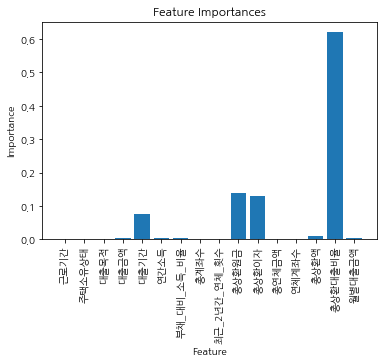

In [359]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)),minmax_df.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [360]:
feature_importances

array([1.86287196e-03, 3.94204369e-04, 1.73255344e-03, 4.74505307e-03,
       7.47612150e-02, 4.36487888e-03, 3.80209268e-03, 1.51824439e-03,
       5.11340165e-04, 1.39800819e-01, 1.30909128e-01, 1.93735706e-04,
       1.75933629e-05, 1.13731687e-02, 6.20199338e-01, 3.81376307e-03])

#### B. STANDARD SCALER

In [210]:
minmax_df.head(1)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.0,0.0,0.0,0.0,0.0,0.0,0.550688,0.658669


In [209]:
standard_df.head(1)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,-0.290341,-0.702442,-0.197415,0.186352,-0.812903,-0.468579,-3.961847,-3.888603,-0.043345,-0.07391,-3.9722,-0.391873,-0.290343


In [212]:
maxabs_df.head(1)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,0.930865,0.878382,0.783116,0.324713,0.539855,0.0,0.0,0.0,0.0,0.0,0.0,0.895306,0.930865


In [213]:
robust_df.head(1)

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,-0.347392,0.0,-0.119095,0.012141,-0.736282,0.0,-10.790385,-8.705499,0.0,0.0,-10.982819,-0.414164,-0.347392


In [340]:
from sklearn.model_selection import train_test_split

y = standard_df["대출등급"]
X = standard_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [341]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting classifier
GB_standard = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_standard.fit(X_train, y_train)

y_pred_train = GB_standard.predict(X_train)
y_pred_test = GB_standard.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.887465,0.887569
test,0.857781,0.857395


In [350]:
col_list

['대출금액',
 '대출기간',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수',
 '총상환액',
 '총상환대출비율',
 '월별대출금액']

In [356]:
standard_df.columns.drop(["ID","대출등급"])

Index(['근로기간', '주택소유상태', '대출목적', '대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율',
       '월별대출금액'],
      dtype='object')

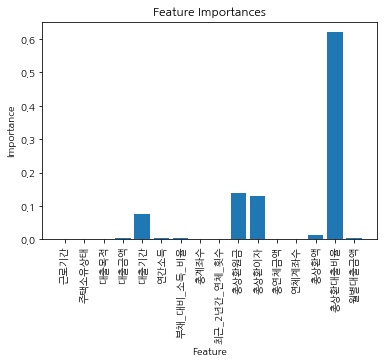

In [357]:
from sklearn.ensemble import GradientBoostingClassifier

# Get feature importances
feature_importances = GB_standard.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)),standard_df.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [358]:
feature_importances

array([1.83162438e-03, 3.73405090e-04, 1.79161429e-03, 4.05202461e-03,
       7.43914608e-02, 4.51734886e-03, 3.87242575e-03, 1.54140200e-03,
       5.25939418e-04, 1.40097562e-01, 1.30826981e-01, 1.86652011e-04,
       3.51526357e-05, 1.15450543e-02, 6.20373122e-01, 4.03823115e-03])

#### C. MAXABS SCALER

In [220]:
from sklearn.model_selection import train_test_split

y = maxabs_df["대출등급"]
X = maxabs_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting classifier
GB_maxabs = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_maxabs.fit(X_train, y_train)

y_pred_train = GB_maxabs.predict(X_train)
y_pred_test = GB_maxabs.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.870603,0.870167
test,0.836440,0.834904


#### D. ROBUST SCALER

In [222]:
from sklearn.model_selection import train_test_split

y = robust_df["대출등급"]
X = robust_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [223]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting classifier
GB_robust = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting classifier
GB_robust.fit(X_train, y_train)

y_pred_train = GB_robust.predict(X_train)
y_pred_test = GB_robust.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.763053,0.760244
test,0.749000,0.744899


### 5. XGBoost

#### A. MINMAX SCALER

In [336]:
from sklearn.model_selection import train_test_split

y = minmax_df["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = minmax_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [337]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.798712,0.797896
test,0.788930,0.787606


#### B. STANDARD SCALER

In [342]:
from sklearn.model_selection import train_test_split

y = standard_df["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = standard_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [343]:
import xgboost as xgb

xgb_standard = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_standard.fit(X_train, y_train)

y_pred_train = xgb_standard.predict(X_train)
y_pred_test = xgb_standard.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.798712,0.797896
test,0.788930,0.787606


#### C. MAXABS SCALER

In [228]:
from sklearn.model_selection import train_test_split

y = maxabs_df["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = maxabs_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [229]:
import xgboost as xgb

xgb_maxabs = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_maxabs.fit(X_train, y_train)

y_pred_train = xgb_maxabs.predict(X_train)
y_pred_test = xgb_maxabs.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.725887,0.719055
test,0.711460,0.703423


#### D. ROBUST SCALER

In [230]:
from sklearn.model_selection import train_test_split

y = robust_df["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = robust_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [231]:
import xgboost as xgb

xgb_robust = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_robust.fit(X_train, y_train)

y_pred_train = xgb_robust.predict(X_train)
y_pred_test = xgb_robust.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.725887,0.719055
test,0.711460,0.703423


### 6. LightGBM

#### A. MINMAX SCALER

#### B. STANDARD SCALER

#### C. MAXABS SCALER

#### D. ROBUST SCALER

### 7. AdaBoost

#### A. MINMAX SCALER

In [120]:
minmax_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.550688,0.658669
1,TRAIN_00001,1,0,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.594058,0.698919
2,TRAIN_00002,5,0,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.561741,0.647637
3,TRAIN_00003,8,0,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.592033,0.698919
4,TRAIN_00004,11,2,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.641693,0.761682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,1,0,3,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.607148,0.698919
96289,TRAIN_96290,1,0,10,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.758800,0.893879
96290,TRAIN_96291,0,0,3,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.611023,0.698919
96291,TRAIN_96292,5,0,1,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.634138,0.721432


In [123]:
from sklearn.model_selection import train_test_split

y = minmax_df["대출등급"]
X = minmax_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [173]:
# 라이브러리
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

# 가장 기본적인 AdaBoost
adaboost_minmax = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost_minmax.fit(X_train, y_train) 

y_pred_train = adaboost_minmax.predict(X_train)
y_pred_test = adaboost_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.524807,0.512577
test,0.519082,0.507832


##### FEATURE IMPORTANCE

In [145]:
array1 = clf.feature_importances_.flatten()
array1

array([0.  , 0.01, 0.04, 0.01, 0.02, 0.05, 0.06, 0.02, 0.01, 0.37, 0.34,
       0.  , 0.  , 0.01, 0.02, 0.04])

In [147]:
values = minmax_df.columns
values

Index(['ID', '근로기간', '주택소유상태', '대출목적', '대출등급', '대출금액', '대출기간', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액',
       '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [150]:
values = values.drop(["ID","대출등급"])
values

Index(['근로기간', '주택소유상태', '대출목적', '대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율',
       '월별대출금액'],
      dtype='object')

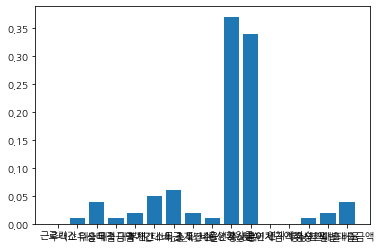

<Figure size 2160x1440 with 0 Axes>

In [167]:
plt.bar(values, array1)
plt.figure(figsize=(30,20))
plt.show()

총상환원금, 총상환이자가 돋보적으로 높음

##### GRID SEARCH

In [176]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 100}


In [177]:
best_params = {'n_estimators': 100, 'learning_rate': 1.0, 'base_estimator': DecisionTreeClassifier(max_depth=1)}

ada_boost_best_minmax = AdaBoostClassifier(**best_params)

ada_boost_best_minmax.fit(X_train, y_train) 

y_pred_train = ada_boost_best_minmax.predict(X_train)
y_pred_test = ada_boost_best_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.524807,0.512577
test,0.519082,0.507832


#### B. STANDARD SCALER

#### C. MAXABS SCALER

#### D. ROBUST SCALER

In [178]:
from sklearn.model_selection import train_test_split

y = robust_df["대출등급"]
X = robust_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [179]:
# 라이브러리
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

# 가장 기본적인 AdaBoost
adaboost_robust = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost_robust.fit(X_train, y_train) 

y_pred_train = adaboost_robust.predict(X_train)
y_pred_test = adaboost_robust.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.524807,0.512577
test,0.519082,0.507832


##### FEATURE IMPORTANCE

In [180]:
array1 = adaboost_robust.feature_importances_.flatten()
array1

array([0.  , 0.01, 0.04, 0.02, 0.02, 0.05, 0.06, 0.02, 0.01, 0.37, 0.34,
       0.  , 0.  , 0.01, 0.02, 0.03])

In [181]:
values = robust_df.columns
values

Index(['ID', '근로기간', '주택소유상태', '대출목적', '대출등급', '대출금액', '대출기간', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액',
       '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [182]:
values = values.drop(["ID","대출등급"])
values

Index(['근로기간', '주택소유상태', '대출목적', '대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율',
       '월별대출금액'],
      dtype='object')

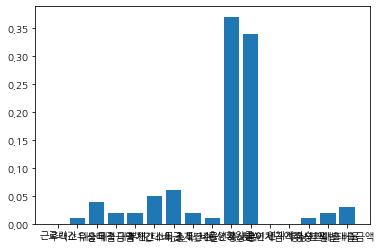

<Figure size 2160x1440 with 0 Axes>

In [183]:
plt.bar(values, array1)
plt.figure(figsize=(30,20))
plt.show()

총상환원금, 총상환이자가 돋보적으로 높음

##### SHAP VALUE

In [ ]:
import shap
from sklearn.ensemble import AdaBoostClassifier
def model_wrapper(X):
    return clf.predict_proba(X)

# Create a SHAP explainer
explainer = shap.Explainer(model_wrapper, X)

# Calculate SHAP values
shap_values = explainer(X)

# Plot the SHAP values
shap.summary_plot(shap_values, X)

PermutationExplainer explainer:  10%|███▉                                    | 9503/96293 [1:42:53<15:24:43,  1.56it/s]

##### GRID SEARCH

In [184]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# Perform grid search
grid_search = GridSearchCV(estimator=adaboost_robust, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 100}


In [185]:
best_params = {'n_estimators': 100, 'learning_rate': 1.0, 'base_estimator': DecisionTreeClassifier(max_depth=1)}

adaboost_best_robust = AdaBoostClassifier(**best_params)

adaboost_best_robust.fit(X_train, y_train) 

y_pred_train = adaboost_best_robust.predict(X_train)
y_pred_test = adaboost_best_robust.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.524807,0.512577
test,0.519082,0.507832


### 8. Bagging

#### A. MINMAX SCALER

In [103]:
from sklearn.model_selection import train_test_split

y = minmax_df["대출등급"]
X = minmax_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [105]:
# 라이브러리
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

base_classifier = DecisionTreeClassifier()

# Define the BaggingClassifier
bagging_minmax = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_minmax.fit(X_train, y_train)

y_pred_train = bagging_minmax.predict(X_train)
y_pred_test = bagging_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.992133,0.992129
test,0.864375,0.863650


##### FEATURE IMPORTANCE

In [110]:
base_classifier = DecisionTreeClassifier()

# Define the BaggingClassifier with decision tree as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Calculate feature importances by averaging across all base estimators
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_classifier.estimators_], axis=0)

# Print feature importances
print("Feature Importances:", feature_importances)

Feature Importances: [1.39361862e-02 5.08779296e-03 8.79448138e-03 1.89152113e-02
 3.44823677e-02 3.47178460e-02 3.06830449e-02 2.40066800e-02
 5.67467126e-03 3.87141478e-01 3.50219304e-01 3.61947268e-04
 2.79767540e-04 3.55770866e-02 3.23444903e-02 1.77776449e-02]


In [111]:
feature_importances

array([1.39361862e-02, 5.08779296e-03, 8.79448138e-03, 1.89152113e-02,
       3.44823677e-02, 3.47178460e-02, 3.06830449e-02, 2.40066800e-02,
       5.67467126e-03, 3.87141478e-01, 3.50219304e-01, 3.61947268e-04,
       2.79767540e-04, 3.55770866e-02, 3.23444903e-02, 1.77776449e-02])

In [112]:
values = minmax_df.columns
values

Index(['ID', '근로기간', '주택소유상태', '대출목적', '대출등급', '대출금액', '대출기간', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액',
       '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [113]:
values = values.drop(["ID","대출등급"])
values

Index(['근로기간', '주택소유상태', '대출목적', '대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율',
       '월별대출금액'],
      dtype='object')

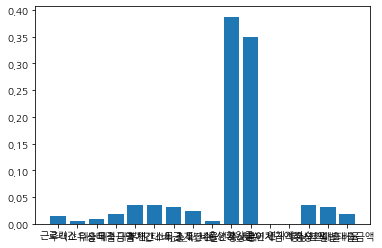

<Figure size 2160x1440 with 0 Axes>

In [115]:
plt.bar(values, feature_importances)
plt.figure(figsize=(30,20))
plt.show()

총상환원금, 총상환이자가 돋보적으로 높음

##### GRID SEARCH

In [116]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

base_estimator = DecisionTreeClassifier()

# Define the BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=bagging_minmax, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}


In [117]:
best_params = {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.5}

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Create Bagging classifier with the best parameters
bagging_best_minmax = BaggingClassifier(base_estimator=base_estimator, **best_params)

# Train the Bagging classifier on the training data
bagging_best_minmax.fit(X_train, y_train)

y_pred_train = bagging_best_minmax.predict(X_train)
y_pred_test = bagging_best_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,1.000000,1.000000
test,0.878602,0.877635


#### B. STANDARD SCALER

#### C. MAXABS SCALER

#### D. ROBUST SCALER

In [118]:
from sklearn.model_selection import train_test_split

y = robust_df["대출등급"]
X = robust_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [119]:
# 라이브러리
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()

# Define the BaggingClassifier
bagging_robust = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_robust.fit(X_train, y_train)

y_pred_train = bagging_robust.predict(X_train)
y_pred_test = bagging_robust.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.992133,0.992129
test,0.864375,0.863650


##### FEATURE IMPORTANCE

In [120]:
base_classifier = DecisionTreeClassifier()

# Define the BaggingClassifier with decision tree as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Calculate feature importances by averaging across all base estimators
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_classifier.estimators_], axis=0)

# Print feature importances
print("Feature Importances:", feature_importances)

Feature Importances: [1.39361862e-02 5.08779296e-03 8.79448138e-03 1.89152113e-02
 3.44823677e-02 3.47178460e-02 3.06830449e-02 2.40066800e-02
 5.67467126e-03 3.87141478e-01 3.50219304e-01 3.61947268e-04
 2.79767540e-04 3.55770866e-02 3.23444903e-02 1.77776449e-02]


In [121]:
feature_importances

array([1.39361862e-02, 5.08779296e-03, 8.79448138e-03, 1.89152113e-02,
       3.44823677e-02, 3.47178460e-02, 3.06830449e-02, 2.40066800e-02,
       5.67467126e-03, 3.87141478e-01, 3.50219304e-01, 3.61947268e-04,
       2.79767540e-04, 3.55770866e-02, 3.23444903e-02, 1.77776449e-02])

In [122]:
values = robust_df.columns
values

Index(['ID', '근로기간', '주택소유상태', '대출목적', '대출등급', '대출금액', '대출기간', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액',
       '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [123]:
values = values.drop(["ID","대출등급"])
values

Index(['근로기간', '주택소유상태', '대출목적', '대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율',
       '월별대출금액'],
      dtype='object')

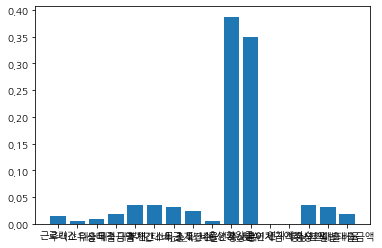

<Figure size 2160x1440 with 0 Axes>

In [124]:
plt.bar(values, feature_importances)
plt.figure(figsize=(30,20))
plt.show()

총상환원금, 총상환이자가 돋보적으로 높음

##### GRID SEARCH

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

base_estimator = DecisionTreeClassifier()

# Define the BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=bagging_robust, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}


In [126]:
best_params = {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.5}

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Create Bagging classifier with the best parameters
bagging_best_robust = BaggingClassifier(base_estimator=base_estimator, **best_params)

# Train the Bagging classifier on the training data
bagging_best_robust.fit(X_train, y_train)

y_pred_train = bagging_best_robust.predict(X_train)
y_pred_test = bagging_best_robust.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,1.000000,1.000000
test,0.877979,0.876955
